# Simple start to Jupyter notebooks

> A: Oh snap! The initializing cell is missing!

> B: No problem! Jupyter notebooks are able to use *magic*

## Notes

jupyter notebook list
-> returns the urls of all the jupyter notebookes currently running

This is useful because you can pass extra arguments when starting the jupyter notebook
jupyter notebook --port 88 --no-browser
This specificies the port and stops it from opening a browser window. When it doesn't open a browser window it will print a url with a token in it for you so you can access the notebook in the browser. If you forget/lose the token you can get it again using the 'list' command.

b - new cell (if side of cell is blue, not green). press enter to start editing inside the cell

If I execute the following line in a cell:
%load snippets/simple_setup.py
it will load the contents of the file simple_setup.py into the cell and comment out the 'load' line


cmd+shift+p: opens a search bar that lets you search through all the jupyter commands and also shows the hot-keys for them

In [48]:
# %load snippets/simple_setup.py
"""
Simple notebook set up
"""


import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn

%matplotlib inline

# some basic plotting directives

# plt.rcParams["figure.figsize"] = (16, 12)
# %config InlineBackend.figure_format = "retina"


In [10]:
''' You can also execute shell commands from inside the notebook! '''
!ls

1_Simple.ipynb			     snippets
2_UI.ipynb			     some_code.py
3_Debugging_Profiling.ipynb	     somemodule.py
4_Extensions.ipynb		     Visualization.ipynb
Extra_Visualization_in_Python.ipynb


In [6]:
!pip install --user pandas matplotlib sklearn seaborn

In [8]:
!pip install version_information

In [5]:
''' If a command starts with % its referred to as 'magic' '''
%load_ext version_information
%version_information pandas, sklearn

Software versions
Python 3.5.3 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 5.3.0
OS Darwin 16.5.0 x86_64 i386 64bit
pandas 0.19.2
sklearn 0.18.1
Wed Jun 28 17:07:22 2017 CEST

In [1]:
!pip install watermark

  Running setup.py bdist_wheel for watermark ... done
  Stored in directory: /home/donal/.cache/pip/wheels/04/33/ef/a05c24dee8b3d1f21955471968bb3fbcab737890f68c6d30c4
Successfully built watermark


In [2]:
''' watermark is a package that prints all info on current notebook '''
%load_ext watermark
%watermark -a "Gerrit Gruben" -d -t -v -p numpy,pandas -g

Gerrit Gruben 2017-06-30 11:55:33 

CPython 3.6.1
IPython 5.3.0

numpy 1.12.1
pandas 0.20.1
Git hash: 503c40dafa06a57c1515e89fd7c8b799aeb1c6e8


## Importing modules 

In [9]:
from somemodule import hello

In [10]:
hello()

Hello World!


In [11]:
''' 
If you edit the file the notebook will not reload it but we can use the autoreload package to set a timestep
and check for changes
'''
hello()

Hello World!


In [12]:
del hello

In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
''' 
autoimport modules - checks for changes in the modules and reimports them if there are changes 
only use this for parts you are constantly changing or debugging. otherwise it inhibits performance
'''
%aimport somemodule

In [15]:
somemodule.hello()

Hello World!


In [17]:
somemodule.hello()

Helo World!


In [18]:
from IPython.display import FileLink

In [20]:
''' I think this adds a hyperlink to a specific file so you know where the resu '''
FileLink("Simple.ipynb")

/home/donal/cyberdyne/pydata2017/leveling_up_jupyter_skills/leveling-up-jupyter/notebooks/Simple.ipynb

## Some Editing tricks 

Demonstrating auto complete.

<kbd>TAB</kbd> for auto-completion of identifier,

<kbd>Shift+Tab</kbd> for auto-completion of parameters

Note to self: show merging of cells, split etc. here

In 'blue' mode use:
x - cut cell
d,d - delete cell
y - change cell to code
m - change cell to markdown

to merge cells: select multiple by shift+up/down then open the search bar and search for merge

In [35]:
'''
import sklearn.
press tab at this point to see all the sklearn modules which can be imported
'''

import sklearn

In [36]:
from sklearn.datasets import load_boston

In [37]:
''' User shift+tab to view the signature and docstring of the function '''
load_boston()

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [38]:
df = load_boston()

In [39]:
X, y = df.data, df.target

In [40]:
from sklearn.cross_validation import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf_reg = RandomForestRegressor(2)

In [45]:
''' View help '''
RandomForestRegressor?

In [46]:
rf_reg.fit(X_train, y_train)
print(mean_squared_error(y_test, rf_reg.predict(X_test)))

9.10375984252


In [49]:
# Just need a df
from sklearn.datasets import california_housing

cal = california_housing.fetch_california_housing()
df = pd.DataFrame(data=cal.data, columns=cal.feature_names, index=cal.target)

df.head(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4.526  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
3.585  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
3.521  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3.413  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
3.422  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
2.697  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
2.992  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
2.414  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
2.267  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
2.611  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

       Longitude  
4.526    -122.23  
3.585    -122.22  
3.521    -122.24  
3.413    -122.25  
3.422    -122.25  
2.697    -122.25  
2.992    -122.25  
2.414    -122.25  
2.267    -122.26  
2.611    -122.25

## Very quick plotting (just for export really)

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

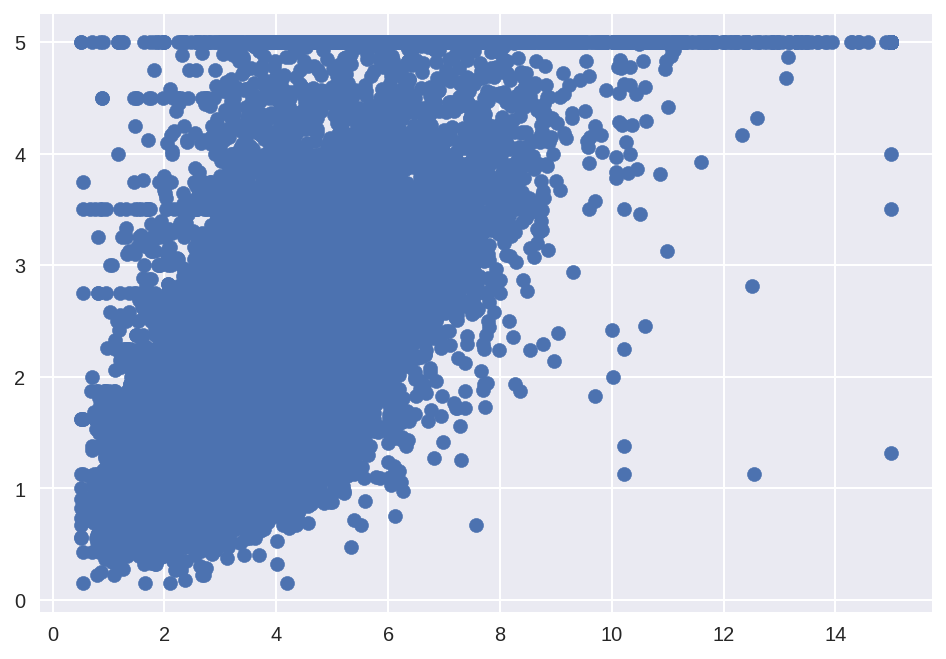

In [56]:
plt.scatter(df.MedInc, df.index)

In [52]:
import seaborn as sns

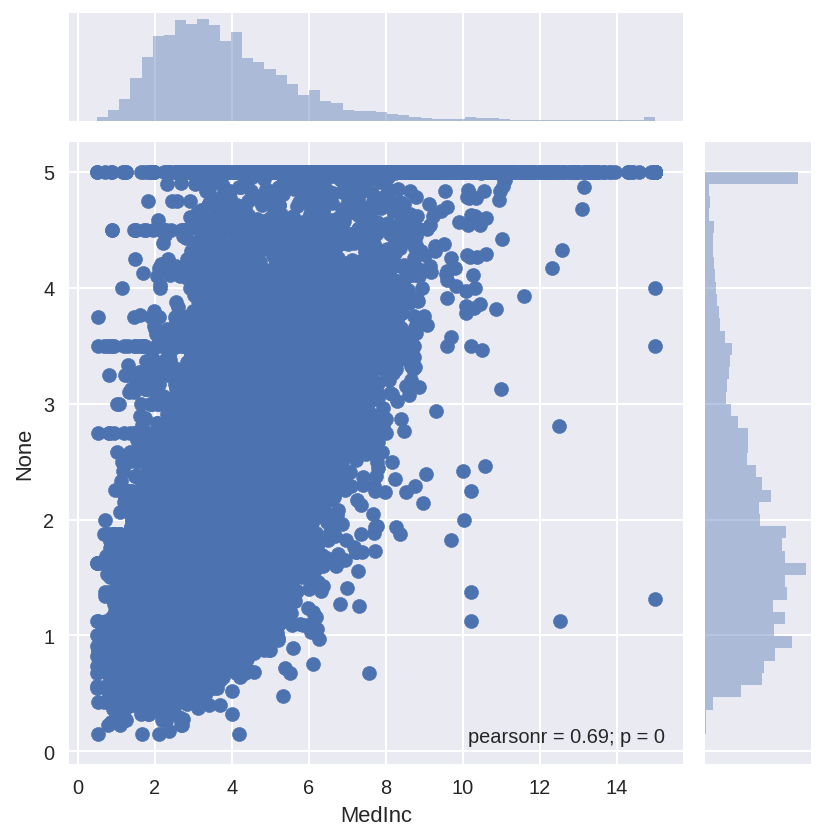

In [57]:
sns.jointplot(df.MedInc, df.index)

Try export > html, > pdf (requires pandoc or even a LaTeX installation).

Then try again and compare the figures with the setting:

In [55]:
''' After running this cell, then rerun the cells above. The images will now be higher quality '''
%config InlineBackend.figure_format = "retina"

## Outputting notebooks as python files, pdfs, etc.
File -> download as ->

## Some magic and multiple outputs 

In [58]:
x, y = 5, 3
x
y

3

In [66]:
# Show all output values, not just the last line
# To omit certain outputs, just append a semicolon at the end of the line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [67]:
x, y = 5, 3
x
y
x;
y

5

3

5

3

Jupyter has a kind of meta-commands starting with the percent character. Some of these are useful for displaying information, such as writing formulas with latex.

In [69]:
# You can even use these to run javascript, html etc in cells
%lsmagic

Available line magics:
%aimport  %alias  %alias_magic  %autocall  %automagic  %autoreload  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %watermark  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%p

In [62]:
%whos

Variable                Type                     Data/Info
----------------------------------------------------------
FileLink                type                     <class 'IPython.lib.display.FileLink'>
InteractiveShell        MetaHasTraits            <class 'IPython.core.inte<...>eshell.InteractiveShell'>
RandomForestRegressor   ABCMeta                  <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
X                       ndarray                  506x13: 6578 elems, type `float64`, 52624 bytes
X_test                  ndarray                  127x13: 1651 elems, type `float64`, 13208 bytes
X_train                 ndarray                  379x13: 4927 elems, type `float64`, 39416 bytes
cal                     Bunch                    {'data': array([[   8.325<...> 33 (1997) 291-297.\n\n'}
california_housing      module                   <module 'sklearn.datasets<...>s/california_housing.py'>
df                      DataFrame                       MedInc  HouseAge  <...>n[20

In [63]:
%%latex
$$ x^3 + C = \int{\frac{1}{3} x^2 \; dx} \quad (C \in \mathbb{R})$$

<IPython.core.display.Latex object>

In [36]:
# learn unix command line commands

%%system
ls -laH
du -sh .

['total 7784',
 'drwxr-xr-x  11 ggruben  1566476737      374 Jun 29 21:23 .',
 'drwxr-xr-x  13 ggruben  1566476737      442 Jun 29 16:05 ..',
 'drwxr-xr-x   8 ggruben  1566476737      272 Jun 29 17:12 .ipynb_checkpoints',
 '-rw-r--r--   1 ggruben  1566476737    13452 Jun 29 21:23 1_Simple.ipynb',
 '-rw-r--r--   1 ggruben  1566476737      972 Jun 29 15:26 2_UI.ipynb',
 '-rw-r--r--   1 ggruben  1566476737     1843 Jun 29 14:41 3_Debugging_Profiling.ipynb',
 '-rw-r--r--@  1 ggruben  1566476737  3737689 Jun 29 21:23 Extra_Visualization_in_Python.ipynb',
 '-rw-r--r--   1 ggruben  1566476737   213477 Jun 28 11:17 Visualization.ipynb',
 'drwxr-xr-x   3 ggruben  1566476737      102 Jun 28 17:09 __pycache__',
 'drwxr-xr-x   6 ggruben  1566476737      204 Jun 29 17:11 snippets',
 '-rw-r--r--   1 ggruben  1566476737       39 Jun 28 17:09 somemodule.py',
 '7.6M\t.']

Useful to know that we can also set environment variables (also useful for Theano)

In [70]:
%env OMP_NUM_THREADS=8

env: OMP_NUM_THREADS=8


%store to pass variables between notebooks!

Retrieve in other notebook with %store -r var_name

In [71]:
x =  3

In [72]:
%store x

Stored 'x' (int)


In [ ]:
# Now, in a different notebook you would be able to load x with
%store -r x

In [74]:
%%writefile some_code.py
# Write code to a file

import numpy as np
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")
plt.show()

Overwriting some_code.py


No clue what `kendalltau` is?

In [75]:
kendalltau?

Object `kendalltau` not found.


In [76]:
%pycat some_code.py

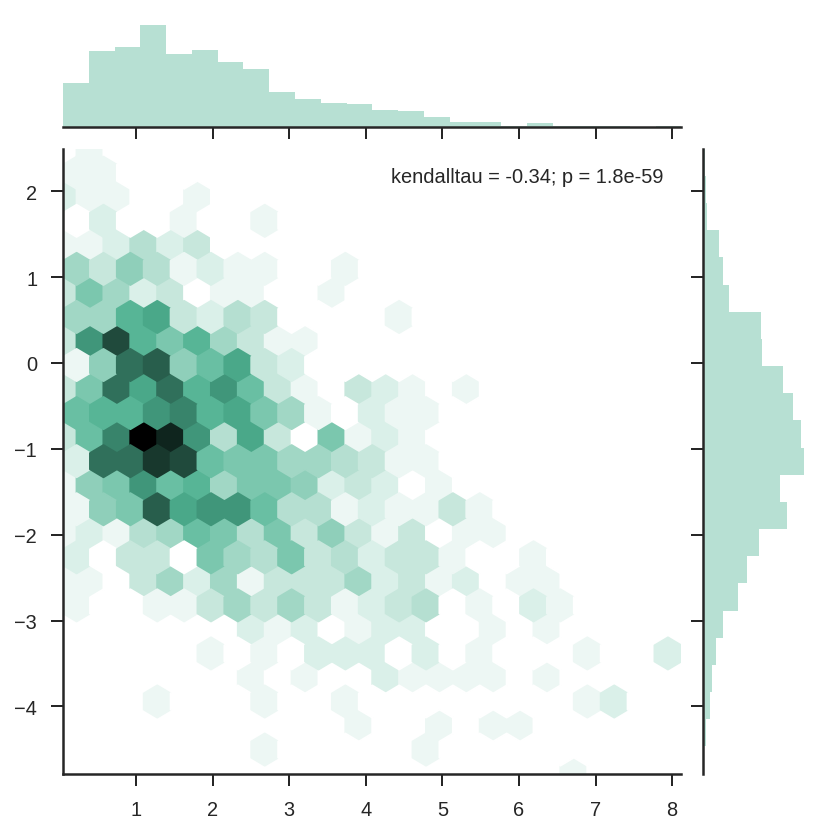

In [77]:
%run some_code.py

In [78]:
%matplotlib inline

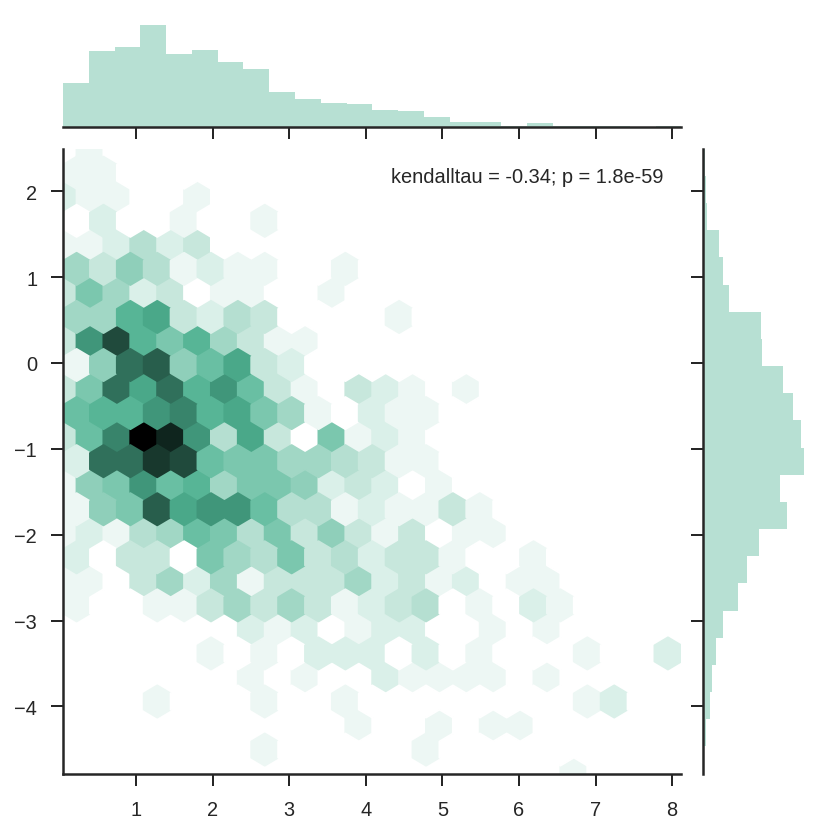

In [79]:
%run some_code.py

In [80]:
InteractiveShell.ast_node_interactivity = "last"